# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup USE env:root as kernal!
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs) #zip the lat and lng together in one column for location use

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#create url-will add city later in forloop
#https://openweathermap.org/current for api request doc information
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists creation
lat = []
lon = []
found_cities = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []

#counter for city
record = 1

#forloop (not all cities found with data - add try/except)
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        found_cities.append(city)
        print(f"City {record} found: {city}")
        record = record + 1
    except:
        print(f"City not found: {city}")
#checkpoint

City 1 found: borskoye
City 2 found: dikson
City 3 found: baykit
City 4 found: puerto ayora
City 5 found: mount gambier
City not found: attawapiskat
City 6 found: guerrero negro
City 7 found: qaanaaq
City 8 found: banda aceh
City 9 found: port hardy
City not found: grand river south east
City not found: belushya guba
City 10 found: kodiak
City 11 found: fortuna
City 12 found: cherskiy
City 13 found: kokkola
City not found: sorvag
City 14 found: grand forks
City 15 found: mataura
City 16 found: carnarvon
City 17 found: torgelow
City 18 found: new norfolk
City 19 found: albany
City 20 found: hermanus
City 21 found: rabo de peixe
City 22 found: khilok
City not found: beypur
City 23 found: pemangkat
City 24 found: busselton
City 25 found: lompoc
City 26 found: dubti
City not found: mys shmidta
City 27 found: noumea
City 28 found: tecoanapa
City 29 found: faanui
City 30 found: hanchuan
City 31 found: ushuaia
City 32 found: isangel
City 33 found: chara
City 34 found: kavaratti
City 35 found:

City 301 found: pontal do parana
City 302 found: maniitsoq
City 303 found: altay
City 304 found: katsuura
City 305 found: lashio
City 306 found: ratodero
City 307 found: veraval
City 308 found: vardo
City 309 found: guiratinga
City 310 found: goure
City 311 found: rio cuarto
City 312 found: sitka
City 313 found: luderitz
City 314 found: simbahan
City 315 found: belfort
City 316 found: grand gaube
City 317 found: tezu
City 318 found: shingu
City 319 found: hendek
City 320 found: tura
City 321 found: kaspiysk
City 322 found: clyde river
City 323 found: pisco
City 324 found: smiths falls
City 325 found: dawlatabad
City 326 found: bara
City 327 found: krosno
City not found: kegayli
City 328 found: daru
City 329 found: lulea
City 330 found: north battleford
City 331 found: novogornyy
City 332 found: neuquen
City 333 found: rosarito
City 334 found: narsaq
City 335 found: malindi
City 336 found: calama
City 337 found: ambulu
City 338 found: ewo
City 339 found: fayaoue
City 340 found: hofn
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_data = pd.DataFrame({"City": found_cities,
                          "Lat": lat,
                          "Lng": lon,
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed":wind_speed,
                          "Country": country,
                          "Date": date
                          })
#Save dataframe as csv
pd.DataFrame.to_csv(city_data, 'city_data.csv')

city_data.head()
#checkpoint

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,borskoye,53.0333,51.7167,41.32,59,6,10.65,RU,1619378434
1,dikson,73.5069,80.5464,16.23,90,100,10.65,RU,1619378434
2,baykit,61.6700,96.3700,31.03,87,85,6.55,RU,1619378434
3,puerto ayora,-0.7393,-90.3518,82.40,65,20,19.57,EC,1619378262
4,mount gambier,-37.8333,140.7667,51.80,93,90,4.61,AU,1619378435


In [9]:
#looks like they want a sum stat table
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.209524,12.675271,61.406178,66.780105,54.659686,8.580942,1.619379e+09
std,33.309428,91.954011,20.253124,22.608414,39.470106,5.417041,1.125507e+02
min,-54.800000,-179.166700,-1.980000,1.000000,0.000000,0.360000,1.619378e+09
25%,-6.222200,-69.873600,46.400000,52.000000,16.000000,4.610000,1.619378e+09
50%,25.208800,16.433300,64.400000,71.000000,65.000000,7.830000,1.619379e+09
75%,48.433300,93.450000,78.800000,84.000000,95.000000,11.500000,1.619379e+09
max,78.218600,177.483300,101.260000,100.000000,100.000000,29.930000,1.619379e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [64]:
#inspect and remove cities w/ humidity over 100%
    #https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
city_data.drop(city_data[city_data['Humidity'] > 100].index, inplace=True)
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,puerto ayora,-0.7393,-90.3518,82.4,65,20,19.57,EC,1619378262
4,mount gambier,-37.8333,140.7667,51.8,93,90,4.61,AU,1619378435
14,mataura,-46.1927,168.8643,43.0,84,97,10.00,NZ,1619378196
15,carnarvon,-24.8667,113.6333,62.6,77,0,5.75,AU,1619378439
17,new norfolk,-42.7826,147.0587,57.0,80,92,1.01,AU,1619378440


In [65]:
#looks like they want another sum stat table (do all count have same value?) is max humidity 100?
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,-21.771058,28.707459,69.834629,73.274286,51.520000,7.638857,1.619379e+09
std,13.709386,97.389296,11.205133,17.830433,39.222155,4.603037,1.173127e+02
min,-54.800000,-175.200000,36.000000,1.000000,0.000000,0.360000,1.619378e+09
25%,-33.781900,-59.678700,62.655000,65.500000,8.500000,4.260000,1.619378e+09
50%,-21.358500,21.933300,72.000000,77.000000,54.000000,7.140000,1.619379e+09
75%,-9.375550,133.983300,78.395000,85.000000,91.500000,10.360000,1.619379e+09
max,-0.130300,175.515300,91.110000,100.000000,100.000000,25.320000,1.619379e+09


The first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot, add a sentence or two explaining what the code is analyzing.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

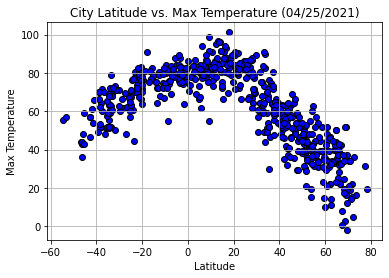

In [38]:
#import date, found https://www.programiz.com/python-programming/datetime/current-datetime
from datetime import date

today = date.today() 
d1 = today.strftime("%m/%d/%Y")
plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({d1})")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('Latitude_vs_MaxTemp.png', bbox_inches='tight')
plt.show()

## Latitude vs. Humidity Plot

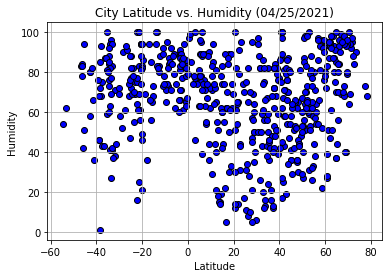

In [39]:
today = date.today() 
d1 = today.strftime("%m/%d/%Y")
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({d1})")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('Latitude_vs_Humidity.png', bbox_inches='tight')
plt.show()
#checkpoint

## Latitude vs. Cloudiness Plot

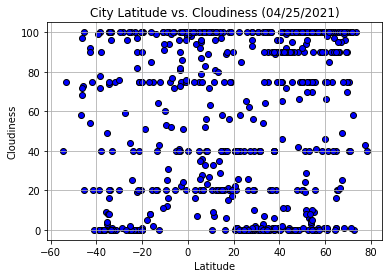

In [40]:
today = date.today() 
d1 = today.strftime("%m/%d/%Y")
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({d1})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('Latitude_vs_Cloudiness.png', bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

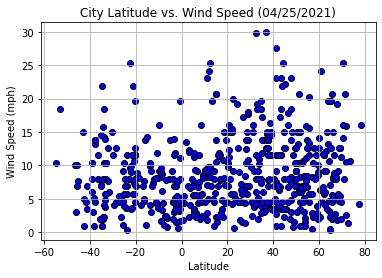

In [41]:
today = date.today() 
d1 = today.strftime("%m/%d/%Y")
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({d1})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('Latitude_vs_WindSpeed.png', bbox_inches='tight')
plt.show()

## Linear Regression

The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.

In [71]:
northern = city_data.loc[city_data["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = city_data.loc[city_data["Lat"] < 0.0]
southern.reset_index(inplace=True)

In [74]:
southern.head()#frustrated. can only get data in southern.... northern is blank - UHHHHHH

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,3,puerto ayora,-0.7393,-90.3518,82.4,65,20,19.57,EC,1619378262
1,4,mount gambier,-37.8333,140.7667,51.8,93,90,4.61,AU,1619378435
2,14,mataura,-46.1927,168.8643,43.0,84,97,10.00,NZ,1619378196
3,15,carnarvon,-24.8667,113.6333,62.6,77,0,5.75,AU,1619378439
4,17,new norfolk,-42.7826,147.0587,57.0,80,92,1.01,AU,1619378440


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


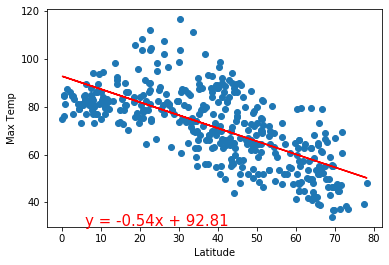

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


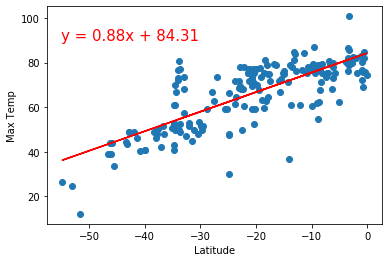

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


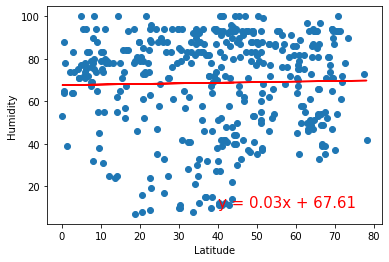

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


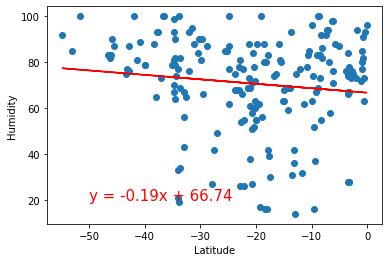

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


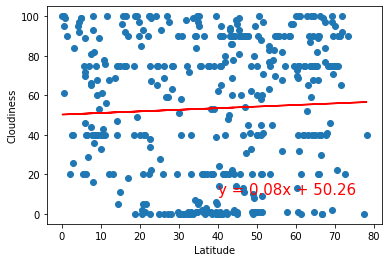

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


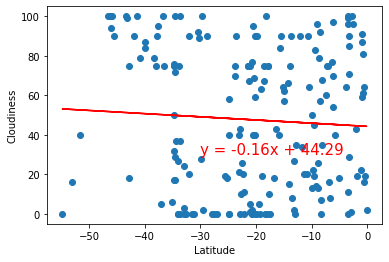

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


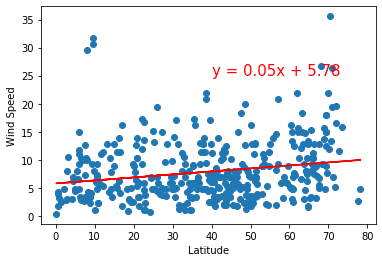

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


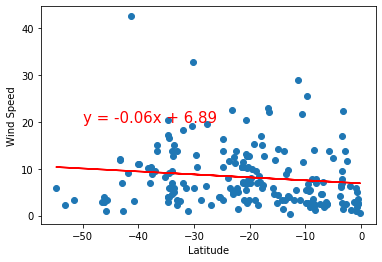